# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Rename all the columns to lower case

In [22]:
df.columns = map(str.lower, df.columns)
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Change the Index to be the Line Names

In [27]:
df = df.set_index('linename')
df.head()

,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,
NQR456W,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Change the index back

In [51]:
df = df.reset_index()
df.head()

,level_0,index,Num_Lines,linename,unit,scp,station,division,date,time,desc,entries,exits
0,0,0,7,NQR456W,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,1,1,7,NQR456W,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,2,2,7,NQR456W,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,3,3,7,NQR456W,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,4,4,7,NQR456W,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order

In [45]:
df['Num_Lines'] = df.linename.map(lambda x: len(x))
df.head()

,level_0,index,Num_Lines,linename,unit,scp,station,division,date,time,desc,entries,exits
0,0,0,7,NQR456W,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,1,1,7,NQR456W,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,2,2,7,NQR456W,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,3,3,7,NQR456W,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,4,4,7,NQR456W,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Write a function to clean a column name

In [46]:
def clean(col_name):
    cleaned = col_name.strip()
    return cleaned

In [47]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [48]:
#Checking the output, we can see the results.
df.columns

Index(['level_0', 'index', 'Num_Lines', 'linename', 'unit', 'scp', 'station',
       'division', 'date', 'time', 'desc', 'entries', 'exits'],
      dtype='object')

## Group the Data by Day of Week and Plot the Sum of The Numeric Columns

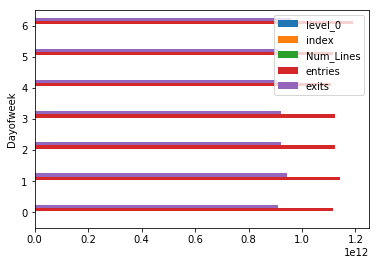

In [66]:
df.date = pd.to_datetime(df.date)
df['Dayofweek'] = df.date.dt.dayofweek
group = df.groupby('Dayofweek').sum()
group.plot(kind='barh')

## Group the Data by Weekend/Weekday and Plot the Sum of the Numeric Columns

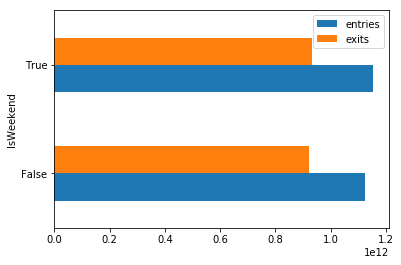

In [67]:
group = group.reset_index()
group['IsWeekend'] = group.Dayofweek.map({0:False, 1:False, 2:False, 3:False, 4:False, 5:True, 6:True})
wked = group.groupby('IsWeekend').mean()
wked[['entries', 'exits']].plot(kind='barh')

## Analysis Question: 

What is misleading about the day of week and weekend/weekday charts you just plotted?

# Answer:

It seems as though both the true and false entries for 'IsWeekend' seem to be exactly the same. Both 'entries' and 'exits' are cumulative data points, and need to be sorted utilizing a different method to produce a useful solution.

## Drop a couple of columns

In [76]:
df = df.drop('station', axis=1)
df = df.drop('linename', axis=1)
df.head()

,index,Num_Lines,division,date,time,desc,entries,exits,Dayofweek
0,0,7,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,5
1,1,7,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,5
2,2,7,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,5
3,3,7,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,5
4,4,7,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,5


## Summary

Great! You practiced your data cleanup-skills using Pandas.